In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
#show all rows and columns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
code=pd.read_excel(r"C:\Users\91980\OneDrive\Desktop\FlipRobo\Country-Code.xlsx")
code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
zomato=pd.read_excel(r"C:\Users\91980\OneDrive\Desktop\FlipRobo\zomato.xlsx")
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df=pd.merge(code,zomato)
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [7]:
df.shape

(9551, 22)

In [8]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [10]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [13]:
df.drop("Restaurant Name",axis=1,inplace=True)

In [14]:
categ=df.select_dtypes(include='object')
num=df.select_dtypes(exclude='object')

                                             |                                             | [  0%]   00:00 ->…


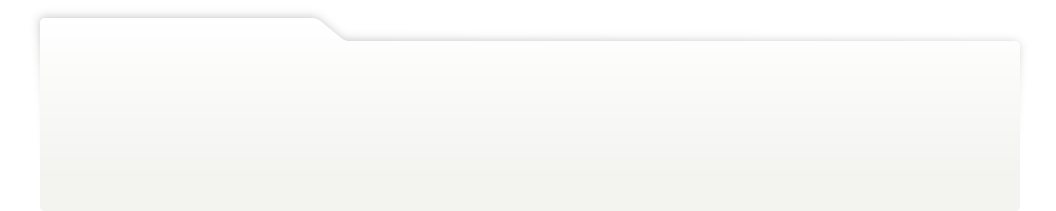
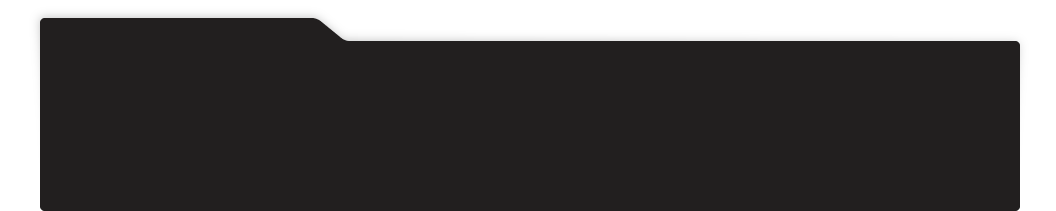
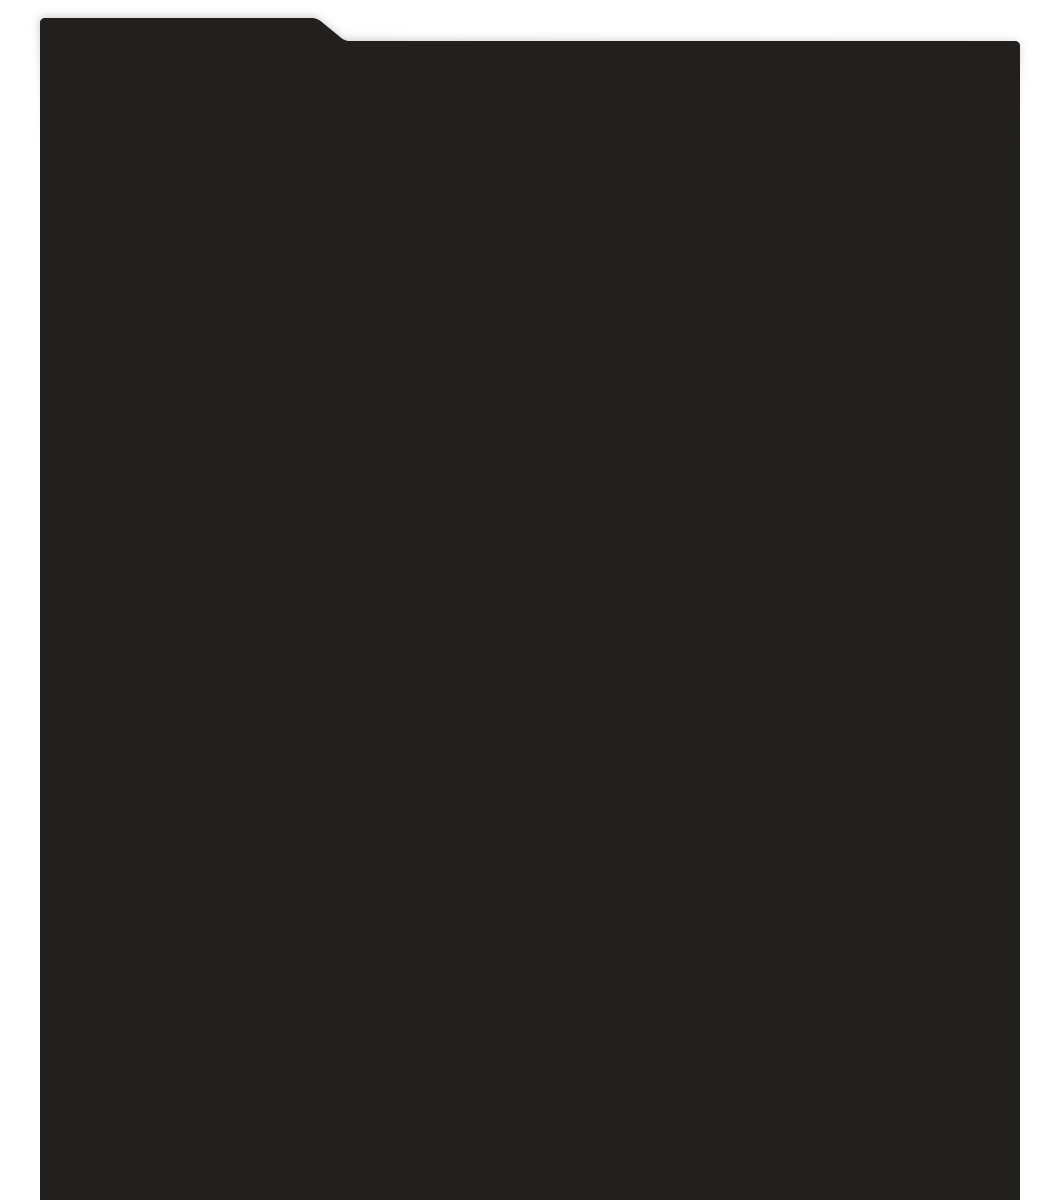
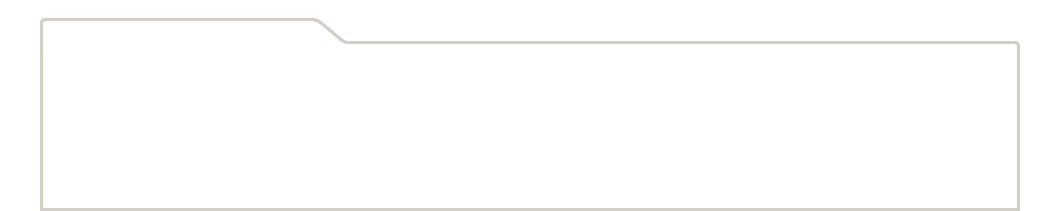
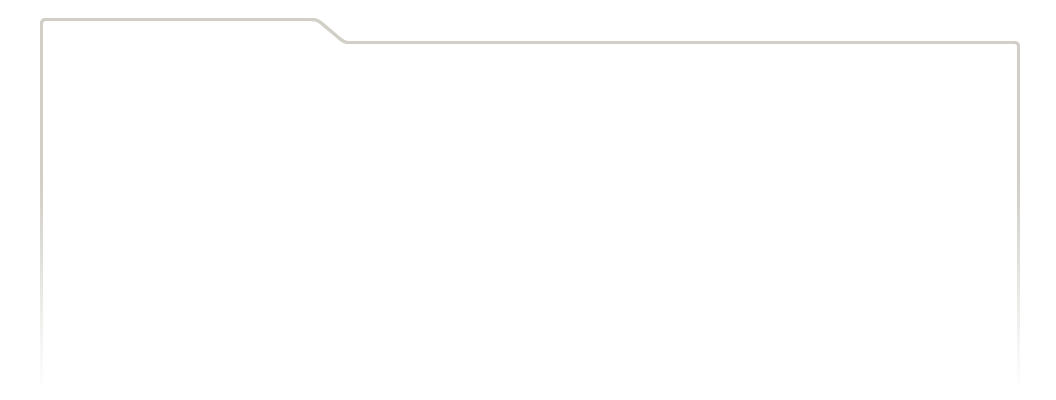
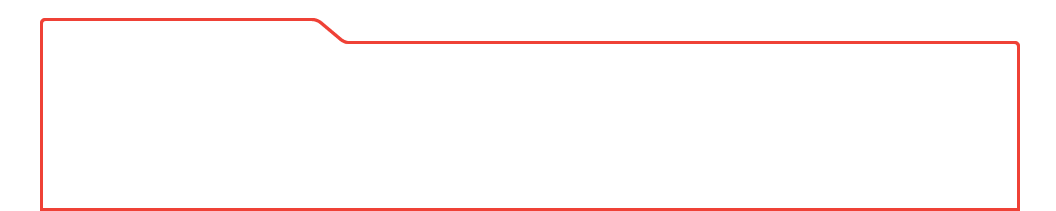
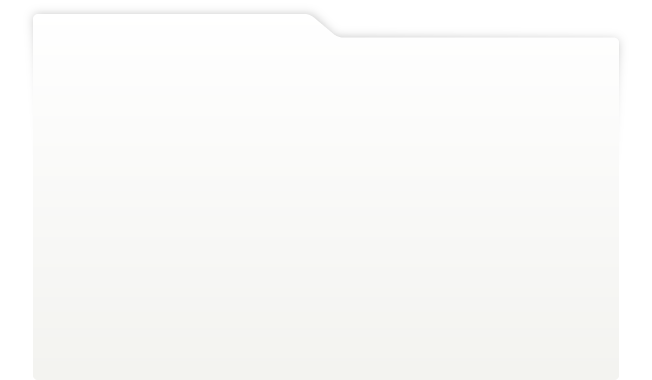
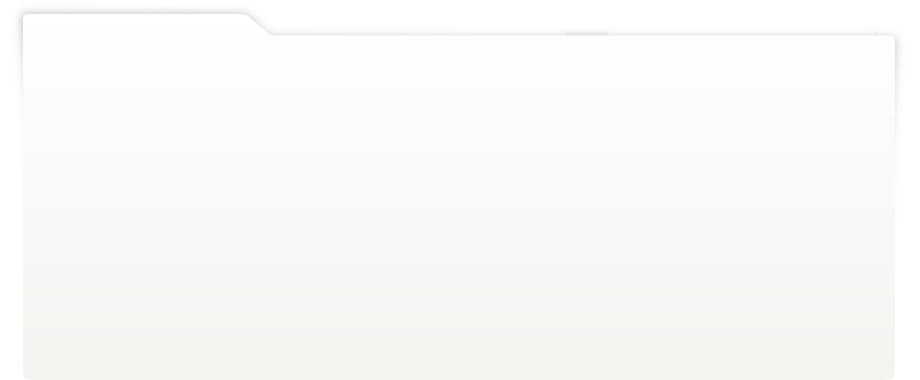
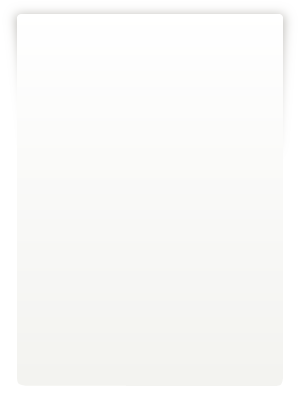
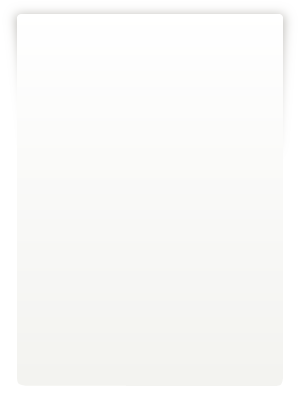
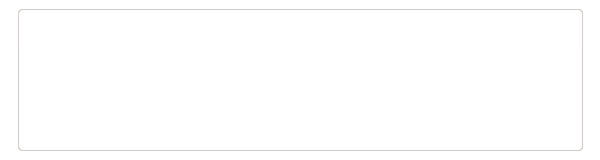
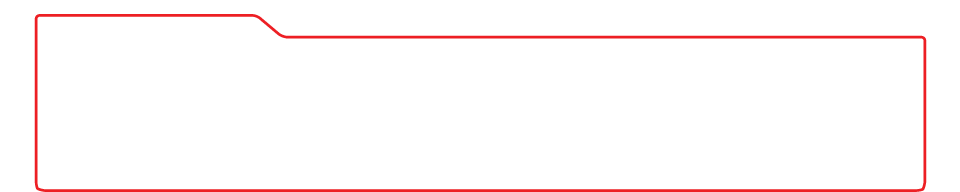
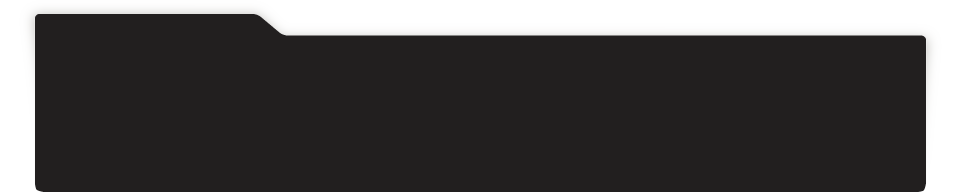
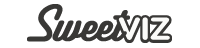
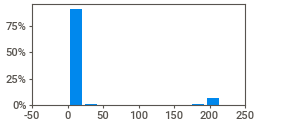
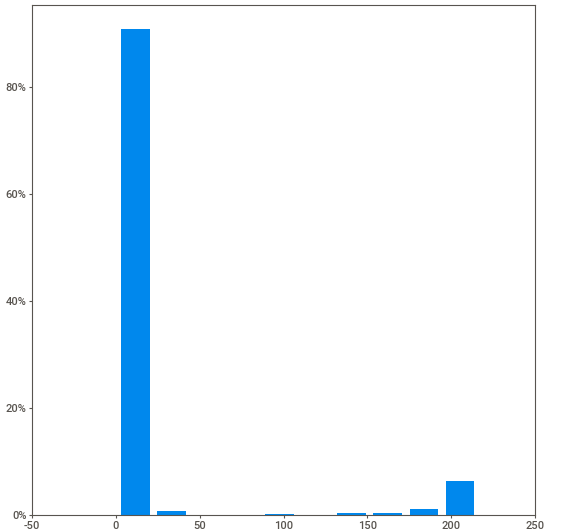
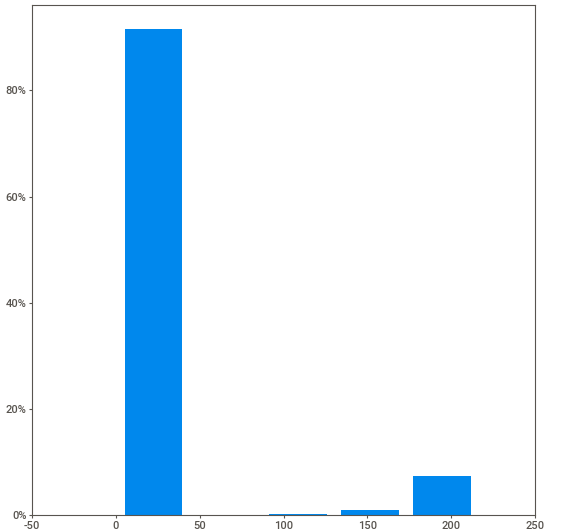
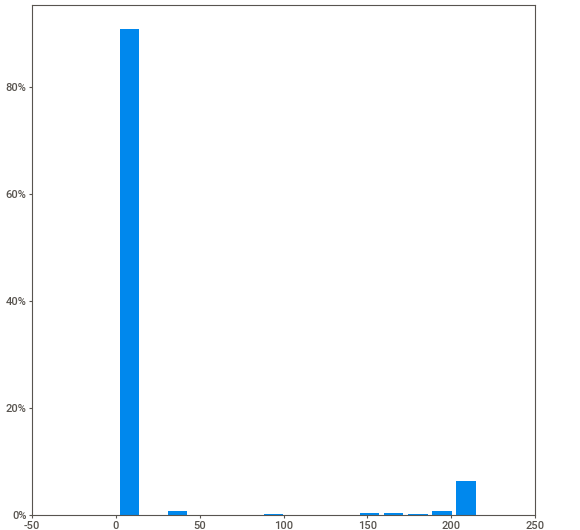
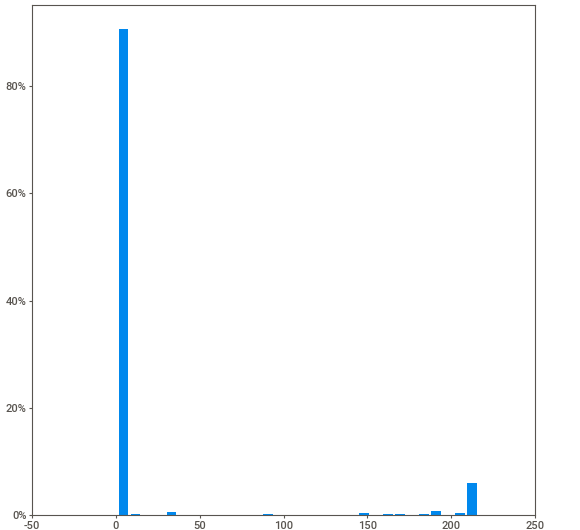
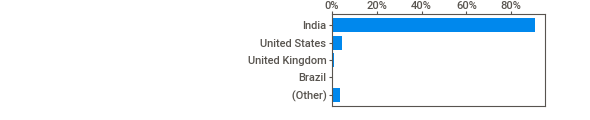
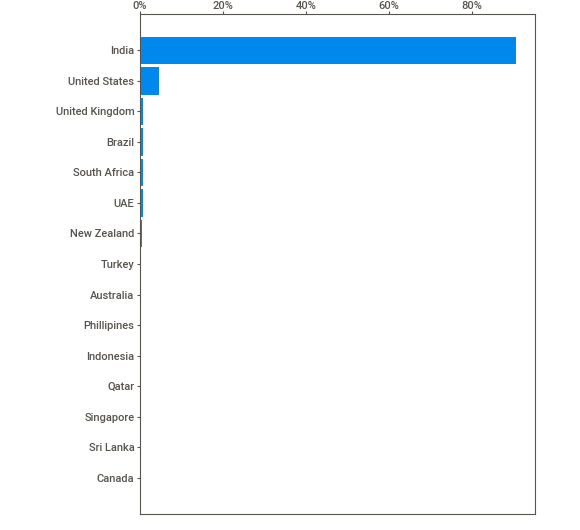
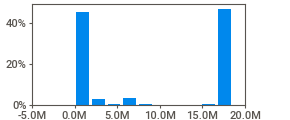
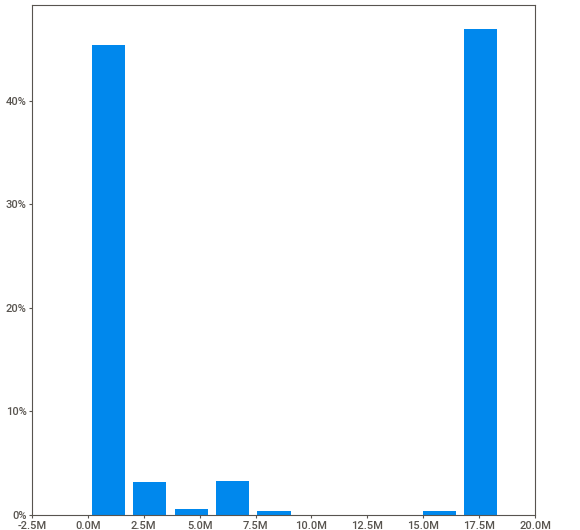
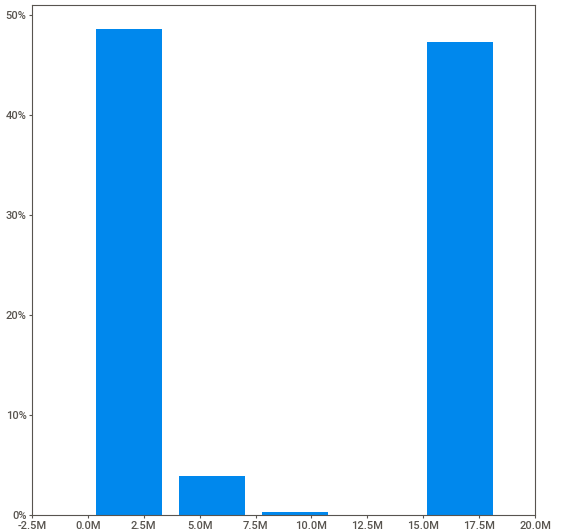
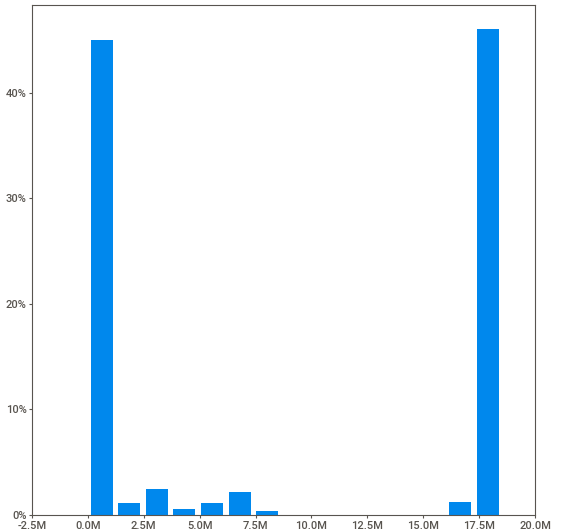
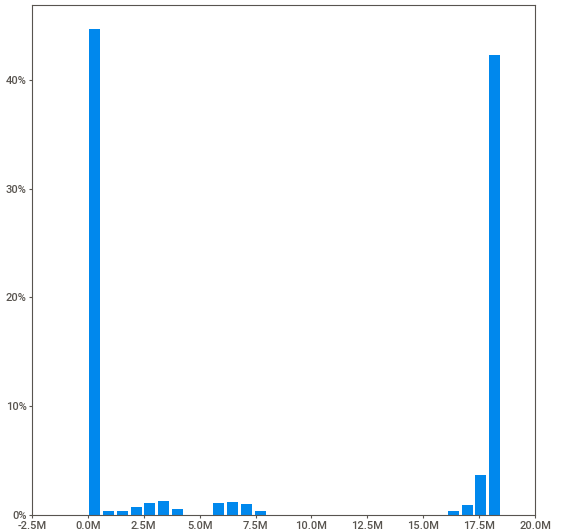
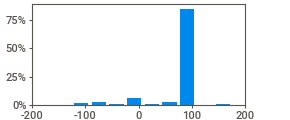
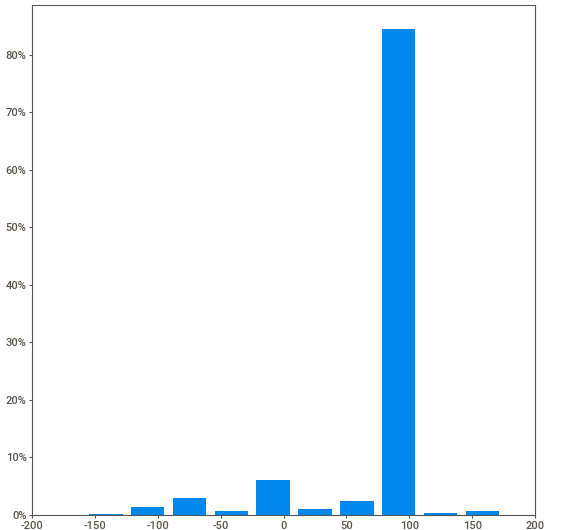
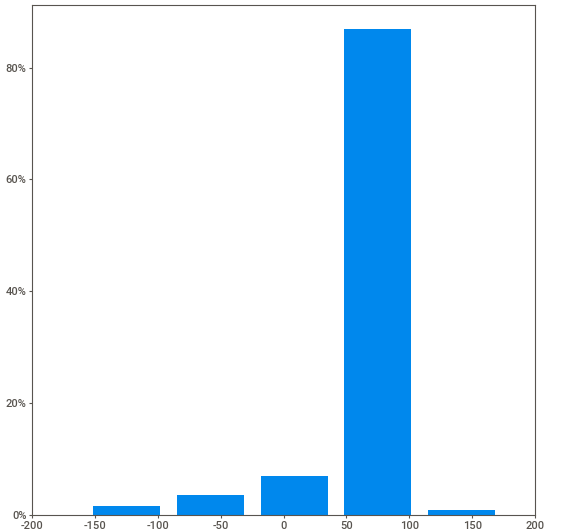
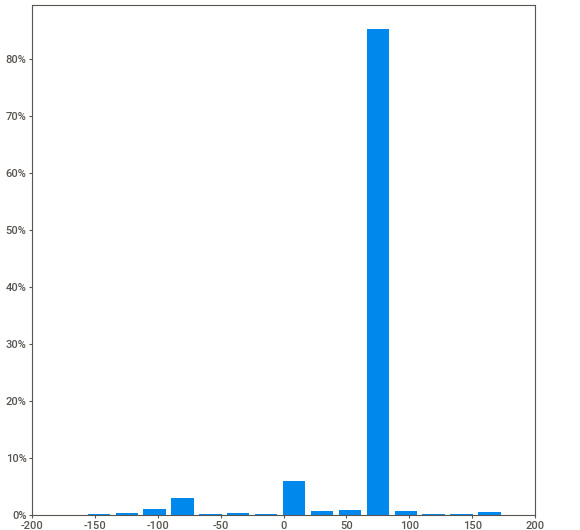
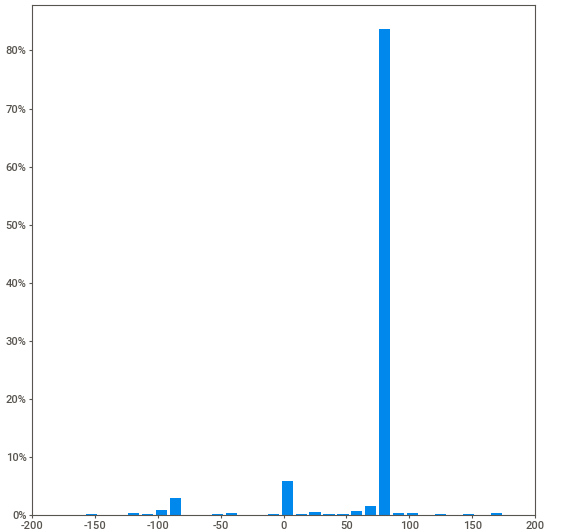
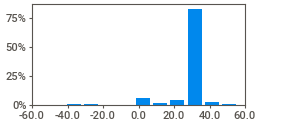
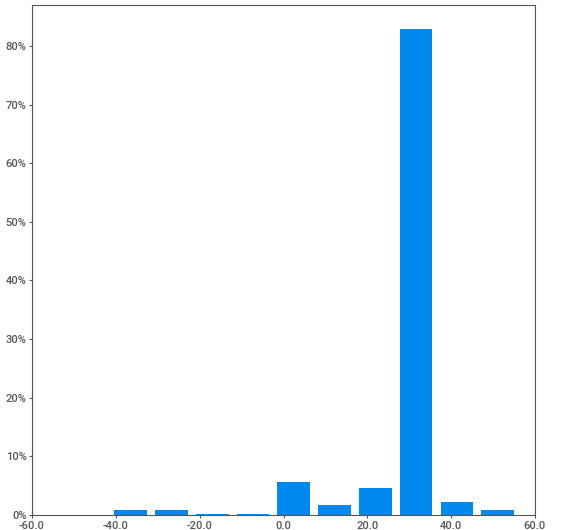
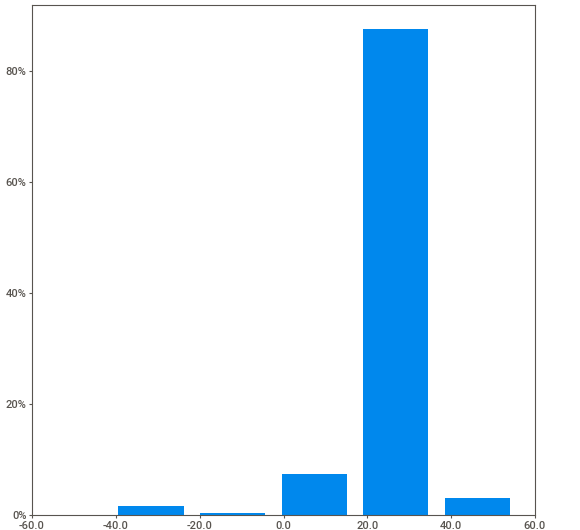
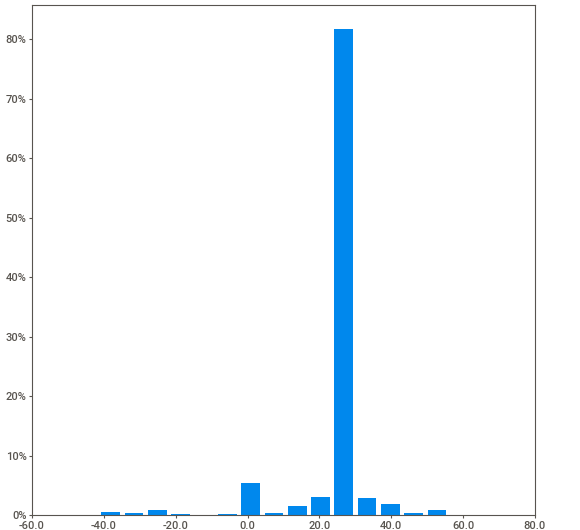
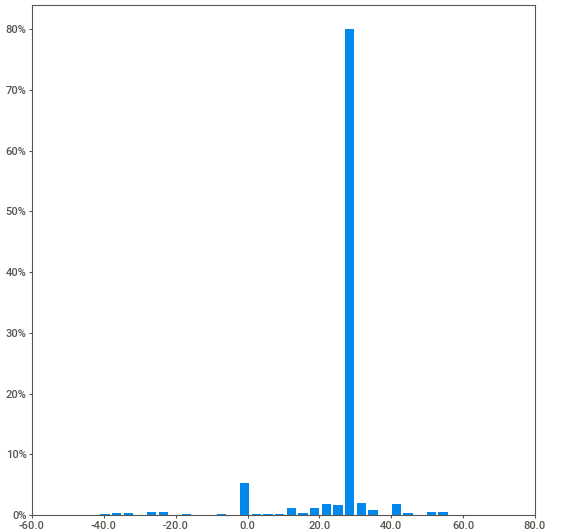
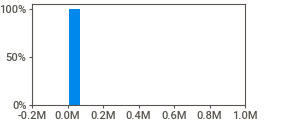
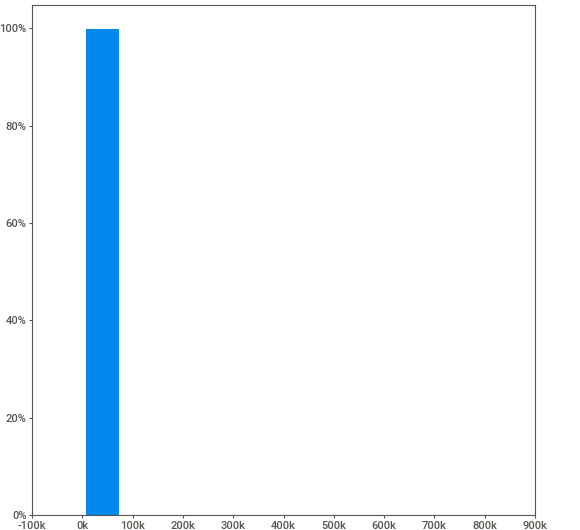
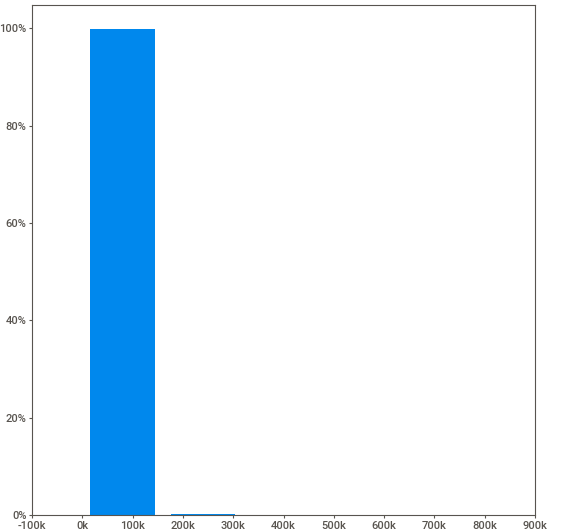
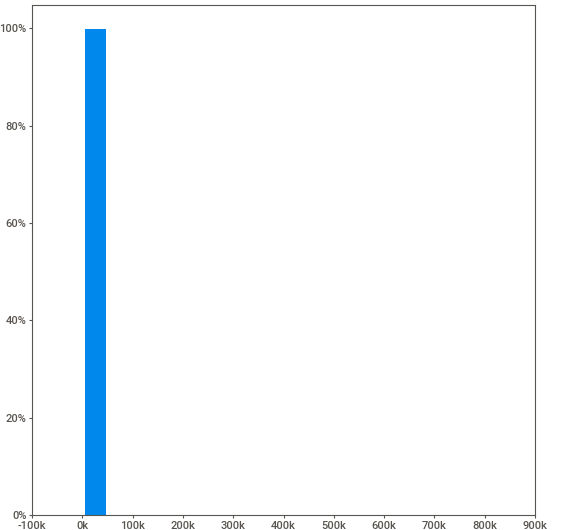
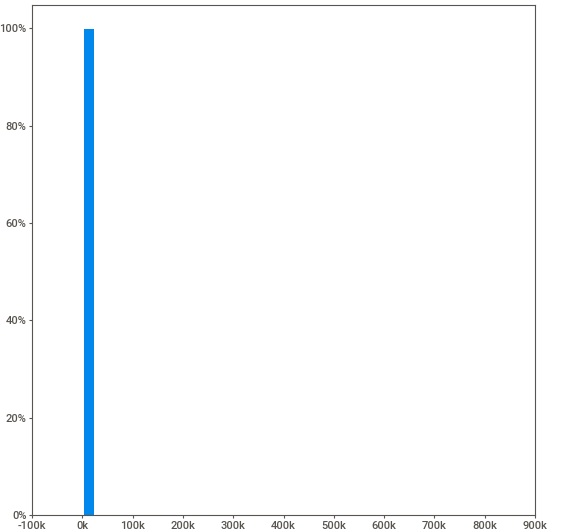
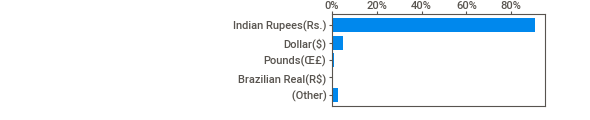
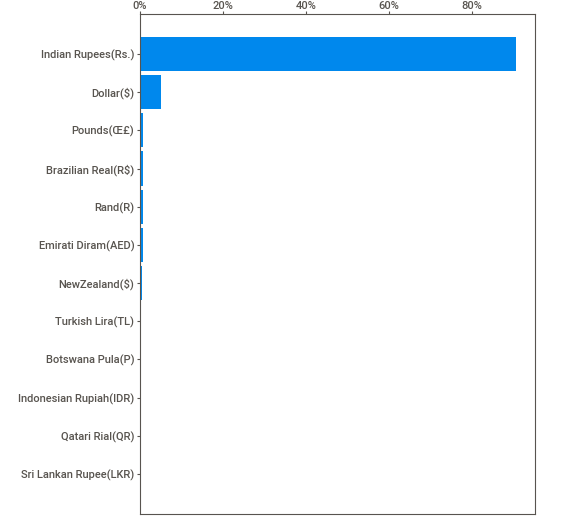
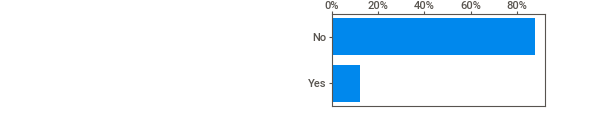
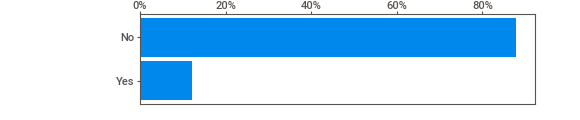
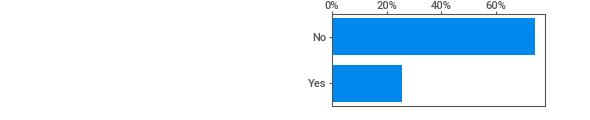
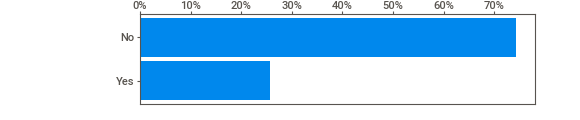
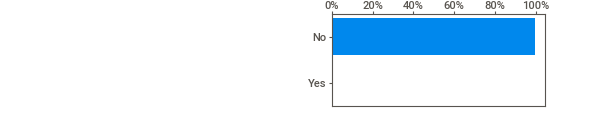
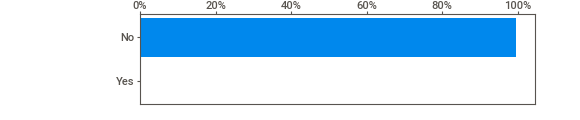
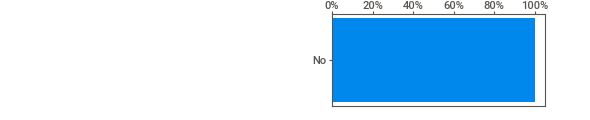
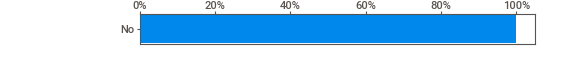
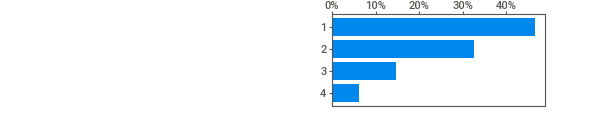
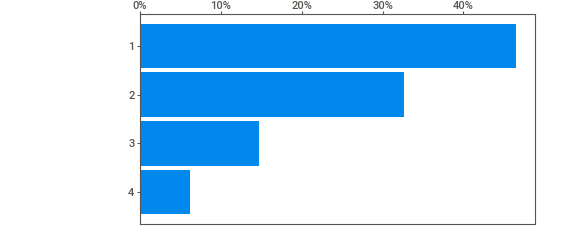
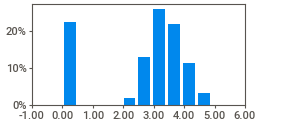
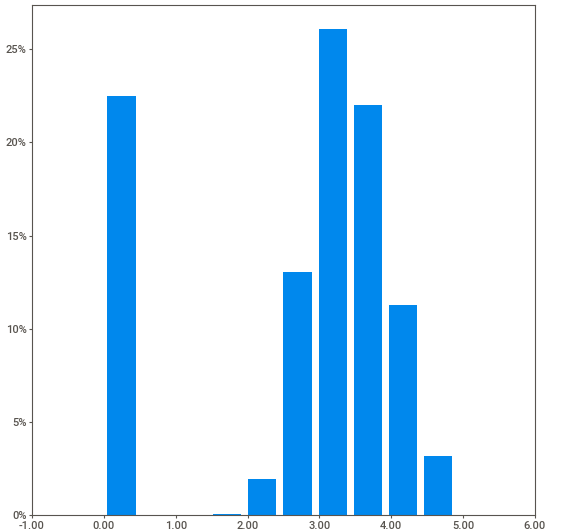
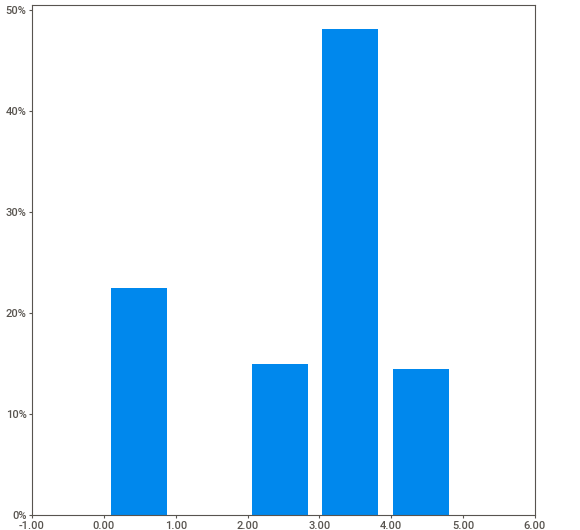
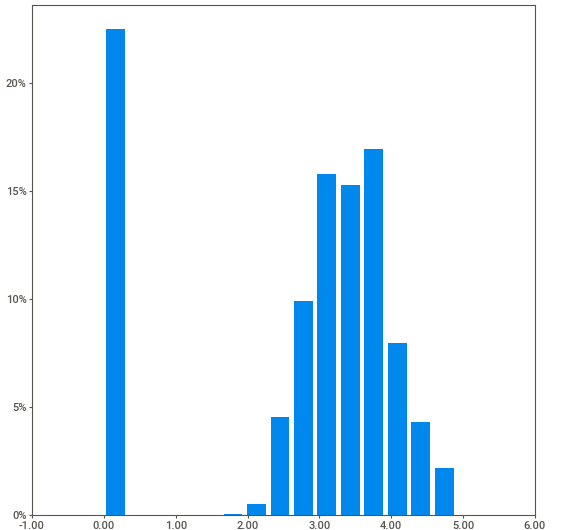
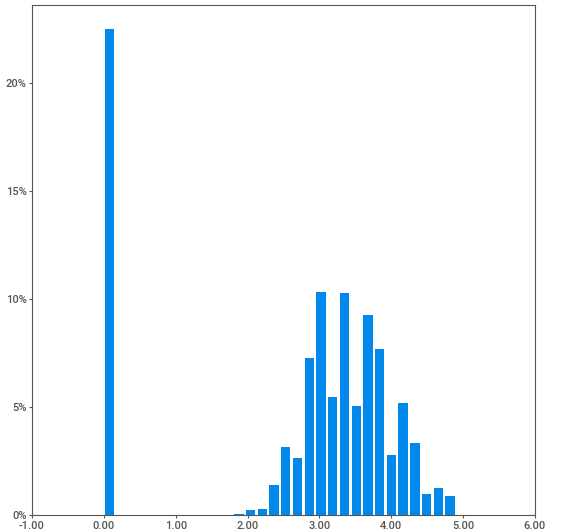
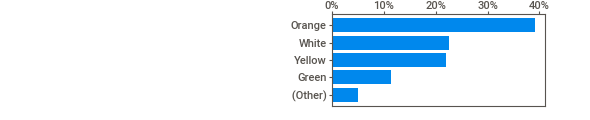
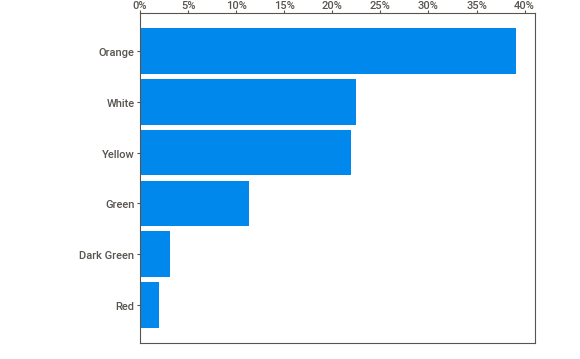
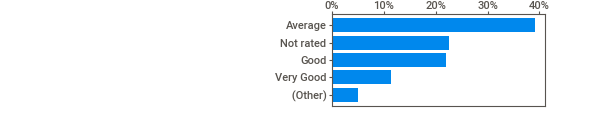
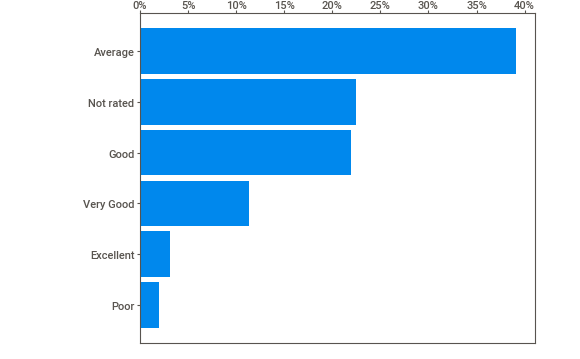
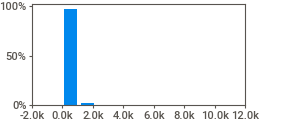
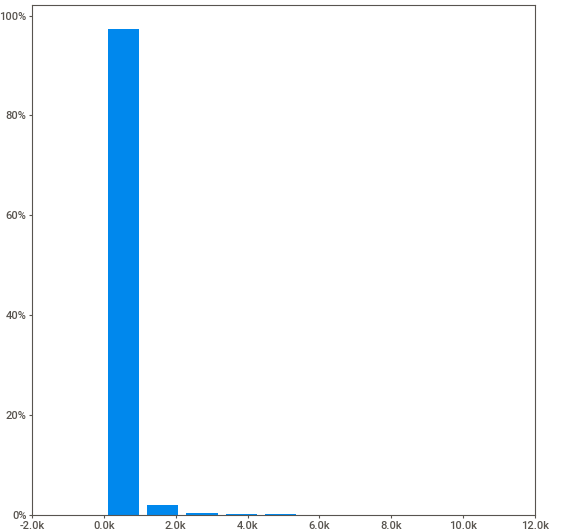
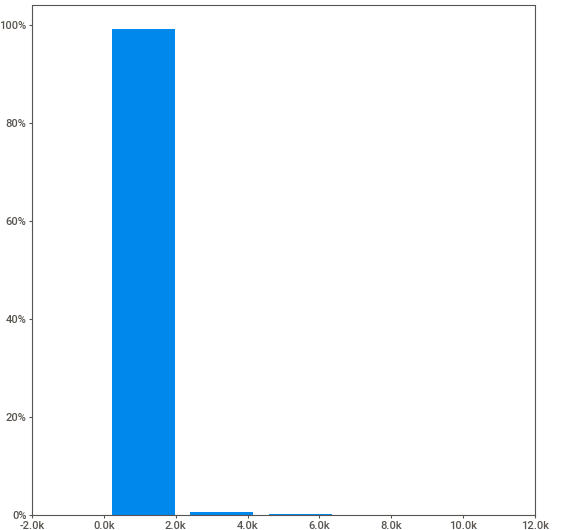
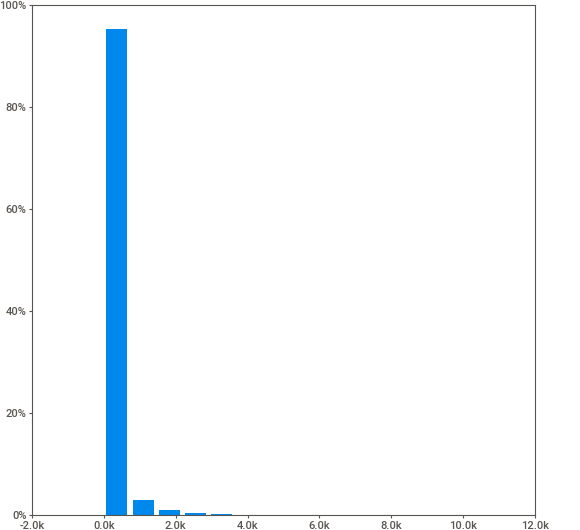
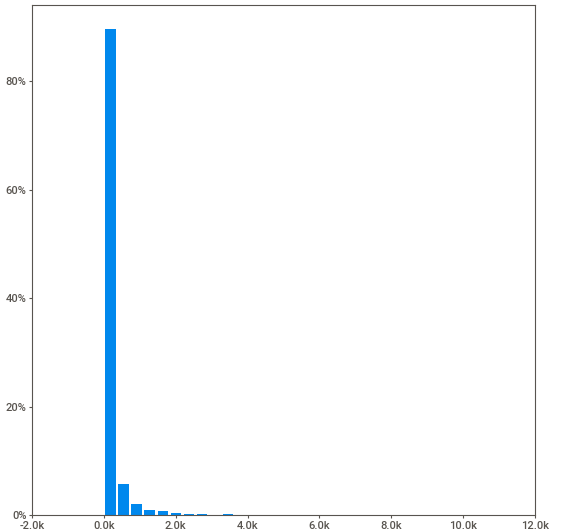
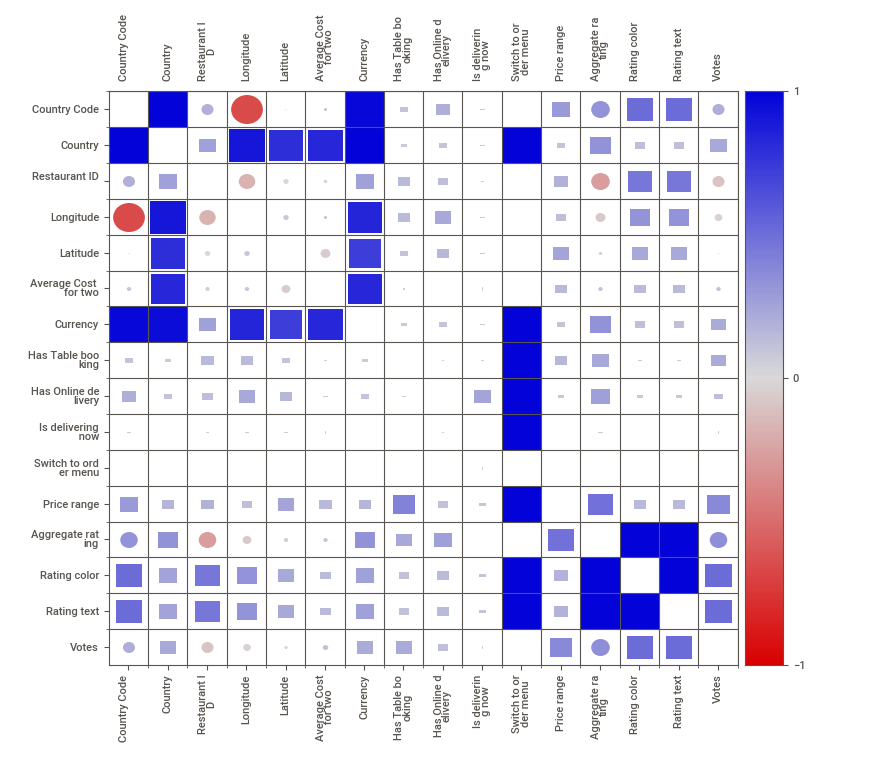
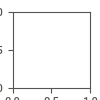

In [15]:
import sweetviz as sw
my_report = sw.analyze(df)
my_report.show_notebook(layout="vertical")

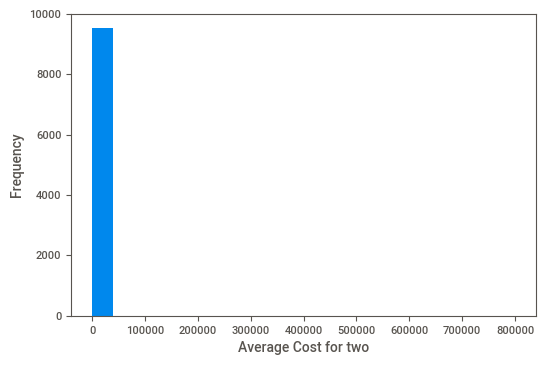

In [16]:
# Plot a histogram of the average cost for two
plt.hist(df['Average Cost for two'], bins=20)
plt.xlabel('Average Cost for two')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Aggregate rating', ylabel='Average Cost for two'>

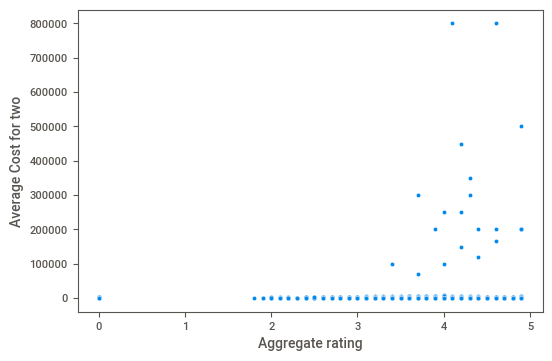

In [17]:
sns.scatterplot(data=df, x='Aggregate rating', y='Average Cost for two')

<AxesSubplot:xlabel='Votes', ylabel='Average Cost for two'>

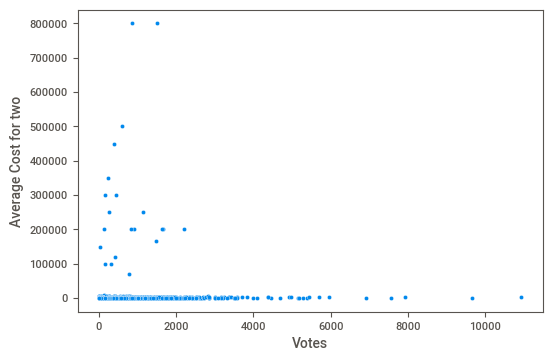

In [18]:
sns.scatterplot(data=df, x='Votes', y='Average Cost for two')

<AxesSubplot:xlabel='Price range', ylabel='Average Cost for two'>

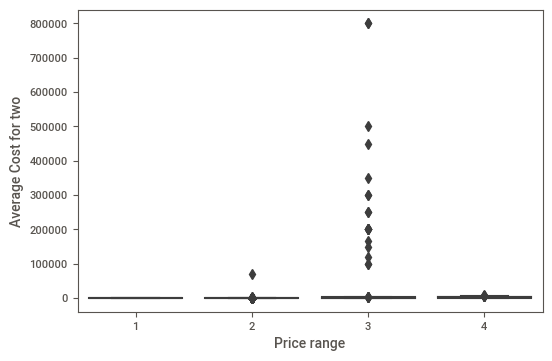

In [19]:
# Check the relationship between the target variable and the categorical variables
sns.boxplot(data=df, x='Price range', y='Average Cost for two')

<AxesSubplot:xlabel='Has Table booking', ylabel='Average Cost for two'>

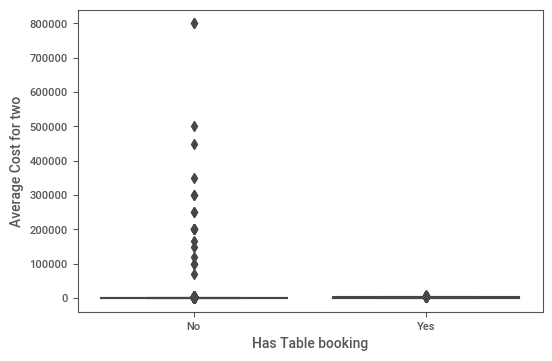

In [20]:
sns.boxplot(data=df, x='Has Table booking', y='Average Cost for two')

<AxesSubplot:xlabel='Has Online delivery', ylabel='Average Cost for two'>

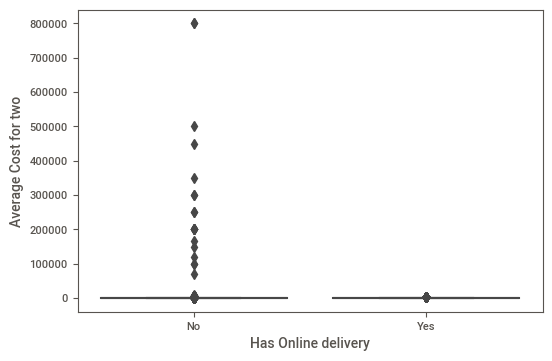

In [21]:
sns.boxplot(data=df, x='Has Online delivery', y='Average Cost for two')

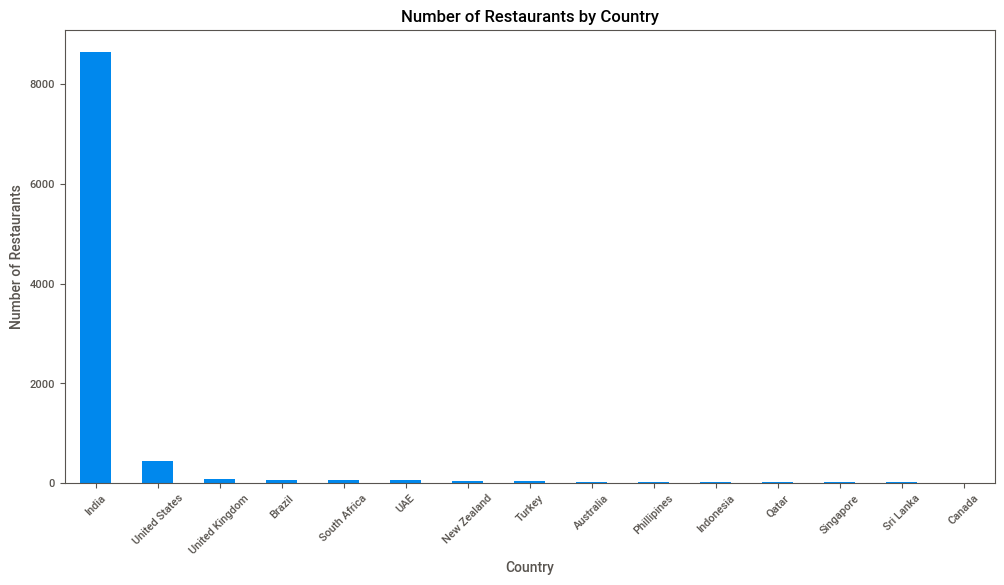

In [22]:
# Group the data by Country name and count the number of restaurants in each country
country_counts = df['Country'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Number of Restaurants by Country')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

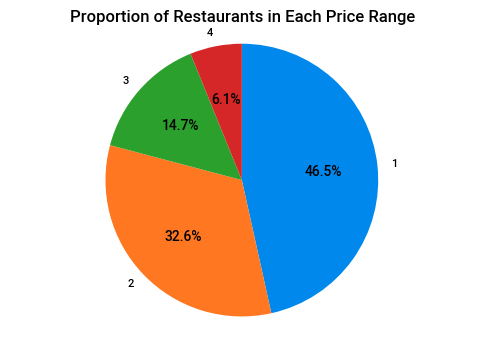

In [23]:
# Calculate the proportion of restaurants in each price range
price_counts = df['Price range'].value_counts(normalize=True)

# Create the pie chart
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proportion of Restaurants in Each Price Range')
plt.axis('equal')
plt.show()

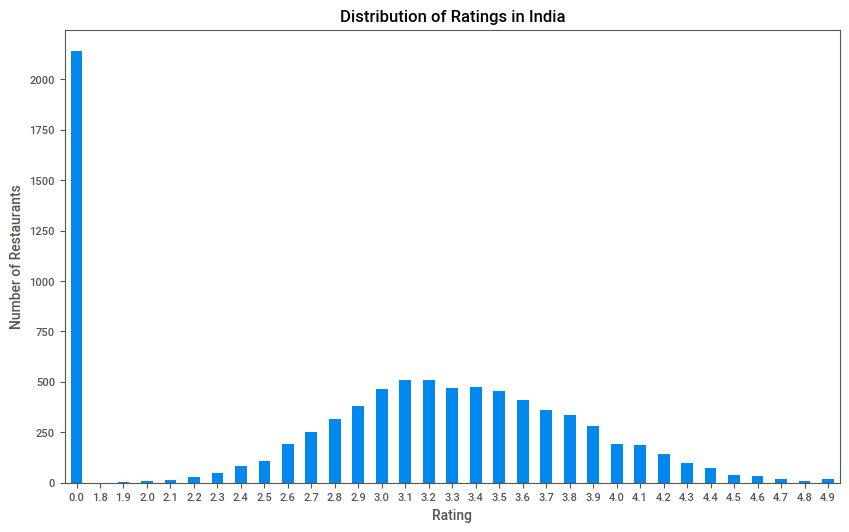

In [24]:
# Filter the data for restaurants in India
india_df = df[df['Country'] == 'India']

# Count the number of restaurants for each rating
rating_counts = india_df['Aggregate rating'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Ratings in India')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

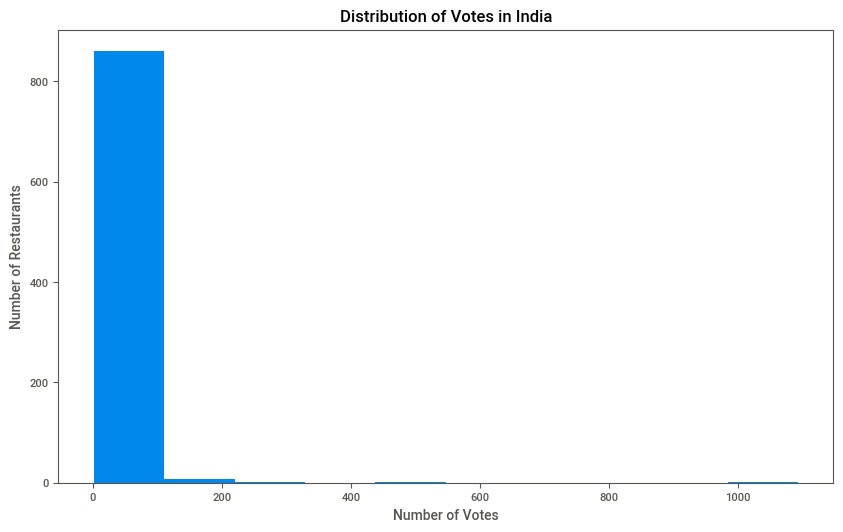

In [25]:
# Filter the data for restaurants in India
india_df = df[df['Country'] == 'India']

# Count the number of restaurants for each number of votes
votes_counts = india_df['Votes'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
votes_counts.plot(kind='hist')
plt.title('Distribution of Votes in India')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

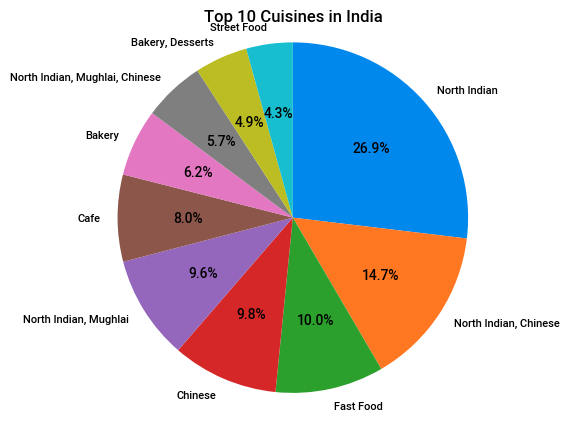

In [26]:
# Filter the data for restaurants in India
india_df = df[df['Country'] == 'India']


# Count the number of occurrences for each cuisine
cuisine_counts = india_df['Cuisines'].value_counts().head(10)

# Create the pie chart
plt.figure(figsize=(5,5))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Top 10 Cuisines in India')
plt.axis('equal')
plt.show()

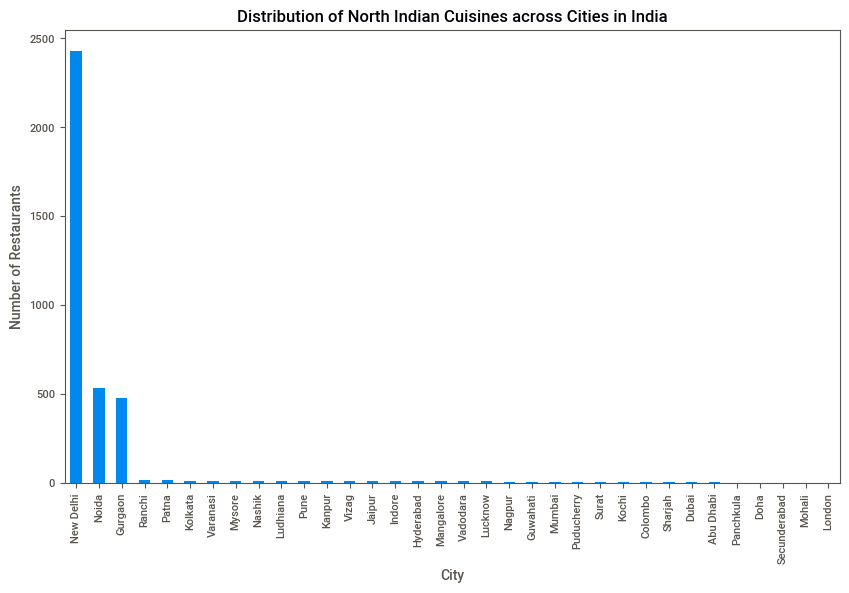

In [27]:
# Select only the rows where the cuisine is North Indian and the country is India
north_indian = df[(df['Cuisines'].str.contains('North Indian')) & (zomato['Country Code'] == 1)]

# Count the number of restaurants in each city
counts = north_indian['City'].value_counts()

# Create a bar chart of the counts
counts.plot(kind='bar', figsize=(10,6))

# Set the title and axis labels
plt.title('Distribution of North Indian Cuisines across Cities in India')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')

# Show the plot
plt.show()

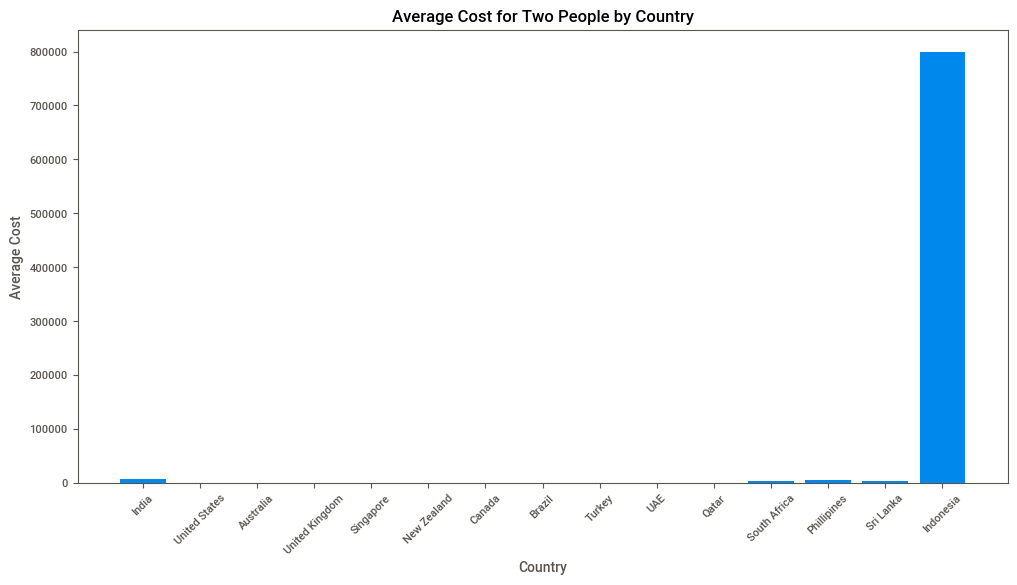

In [28]:
# Group the data by Country Code and calculate the average cost for two people
average_cost = df.groupby('Country')['Average Cost for two'].mean()

# Sort the data by average cost in ascending order
sorted_df = df.sort_values('Average Cost for two')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Country'], sorted_df['Average Cost for two'])
plt.title('Average Cost for Two People by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Perform label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categ:
    df[col] = label_encoder.fit_transform(df[col])

# Perform standard scaling for numerical columns
scaler = StandardScaler()
df[num.columns] = scaler.fit_transform(df[num.columns])

In [30]:
# Split the data into features and target variable
x = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=32)
print("xtrain shape:",xtrain.shape)
print("xtest shape:",xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:",ytest.shape)

xtrain shape: (6685, 20)
xtest shape: (2866, 20)
ytrain shape: (6685,)
ytest shape: (2866,)


CLASSIFICATION MODEL TO PREDICT AVERAGE COST OF TWO

In [32]:
lr= LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print("Mean Absolute Error:",mean_absolute_error(ytest,ypred))
print("Mean Squared Error:",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,ypred)))

scores = cross_val_score(lr, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean Absolute Error: 0.12451873575516381
Mean Squared Error: 1.119495593851025
Root Mean Squared Error: 1.0580621880830186
Scores: [-6.95397494e+01 -7.02418404e+00 -4.96440682e+00 -1.63270095e+00
 -5.83414432e-03]
Mean score: -16.63337507298055
Standard deviation: 26.56720218165211


In [33]:
dtc = DecisionTreeRegressor()
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtest)

print("Mean Absolute Error:",mean_absolute_error(ytest,ypred))
print("Mean Squared Error:",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,ypred)))

scores = cross_val_score(dtc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean Absolute Error: 0.03279826295749108
Mean Squared Error: 0.5858962091608103
Root Mean Squared Error: 0.7654385730813481
Scores: [ 0.59314622  0.72836334  0.73744347  0.73627207 -0.00505366]
Mean score: 0.5580342875311641
Standard deviation: 0.28679931178545315


In [34]:
rfc = RandomForestRegressor()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

print("Mean Absolute Error:",mean_absolute_error(ytest,ypred))
print("Mean Squared Error:",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,ypred)))

scores = cross_val_score(rfc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean Absolute Error: 0.03087610763904695
Mean Squared Error: 0.43377150671650844
Root Mean Squared Error: 0.6586133210894755
Scores: [ 0.79276628  0.82735438  0.87663393  0.83841014 -0.00356594]
Mean score: 0.6663197591409995
Standard deviation: 0.336010376760467


RANDOMFORESTREGRESSOR HAS LOW ROOT MEAN SQUARE BEST MODEL

In [35]:
averageprice=pd.DataFrame({'Averageprice':ytest,'predicted Averageprice':ypred},columns=['Averageprice','predicted Averageprice'])
averageprice

,Averageprice,predicted Averageprice
6908,0.198556,0.109104
5168,-0.055781,-0.057673
9316,-0.073771,-0.073814
1369,-0.024764,-0.037729
7727,-0.049578,-0.053362
1001,-0.037171,-0.030565
7675,-0.037171,-0.038691
287,-0.043374,-0.038877
8316,-0.037171,-0.038722
4768,-0.058883,-0.056308


In [36]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

REGRESSION MODEL TWO PREDICT PRICE RANGE

In [37]:
x=df.drop(['Price range'],axis=1)
y=df['Price range']

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=32)
print("xtrain shape:",xtrain.shape)
print("xtest shape:",xtest.shape)
print("ytrain shape:",ytrain.shape)
print("ytest shape:",ytest.shape)

xtrain shape: (6685, 20)
xtest shape: (2866, 20)
ytrain shape: (6685,)
ytest shape: (2866,)


In [39]:
lr= LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print("Mean Absolute Error:",mean_absolute_error(ytest,ypred))
print("Mean Squared Error:",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,ypred)))

scores = cross_val_score(lr, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean Absolute Error: 0.5682434673113372
Mean Squared Error: 0.5068143076680665
Root Mean Squared Error: 0.7119089180984225
Scores: [ 1.94817214e-01  4.67393823e-01  3.87448725e-01  5.07667866e-01
 -1.22238613e+03]
Mean score: -244.1657611743537
Standard deviation: 489.11019800842274


In [40]:
dtc = DecisionTreeRegressor()
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtest)

print("Mean Absolute Error:",mean_absolute_error(ytest,ypred))
print("Mean Squared Error:",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,ypred)))

scores = cross_val_score(dtc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean Absolute Error: 0.02543020314570009
Mean Squared Error: 0.02808225053030409
Root Mean Squared Error: 0.16757759554995438
Scores: [ 0.300813    0.99042319  1.          0.99860422 -0.340488  ]
Mean score: 0.5898704814155845
Standard deviation: 0.537556153811664


In [41]:
rfc = RandomForestRegressor()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

print("Mean Absolute Error:",mean_absolute_error(ytest,ypred))
print("Mean Squared Error:",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest,ypred)))

scores = cross_val_score(rfc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean Absolute Error: 0.03162592536663953
Mean Squared Error: 0.016041177187011844
Root Mean Squared Error: 0.1266537689412038
Scores: [ 0.5638574   0.99060282  0.99980504  0.99857344 -0.37515642]
Mean score: 0.635536455661756
Standard deviation: 0.5323903760982209


RANDOMFOREST REGRESSOR HAVE LOW ROOT MEAN SQUARE BEST MODEL TO PREDICT PRICE RANGE

In [42]:
pricerange=pd.DataFrame({'pricerange':ytest,'predicted_pricerrange':ypred},columns=['pricerange','predicted_pricerrange'])
pricerange

,pricerange,predicted_pricerrange
6908,2.424090,2.424090
5168,-0.888771,-0.888771
9316,-0.888771,-0.888771
1369,0.215516,0.215516
7727,-0.888771,-0.888771
1001,0.215516,0.226559
7675,0.215516,0.215516
287,0.215516,0.215516
8316,0.215516,0.215516
4768,-0.888771,-0.888771
